In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

# Step 2: Load dataset
df = pd.read_csv("ecommerce_sales_data.csv")

# Show first few rows
df.head()


,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


**Observation:**  
We can see the dataset columns and a few sample records. It contains both numeric and categorical features.


# Part C: Multiple Linear Regression

## 1. Select TWO or MORE features
We include `Quantity` and `Profit`, and also encode categorical columns.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Convert Order Date to datetime and extract useful features
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Order_Year"] = df["Order Date"].dt.year
df["Order_Month"] = df["Order Date"].dt.month

# Drop original date column
df_ml = df.drop(columns=["Order Date"])

# One-hot encode categorical features
df_ml = pd.get_dummies(df_ml, columns=["Product Name", "Category", "Region"], drop_first=True)

# Features and target
X = df_ml.drop(columns=["Sales"])
y = df_ml["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

# Predict
y_pred = multi_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 1754854.7635348828
RMSE: 1324.7093128437207
R2 Score: 0.7202933867924615


1️⃣ Actual vs Predicted Sales
🎯 Purpose:

Model kitna accurate predict kar raha hai ye dikhata hai.

Ideal case → points diagonal line ke paas hone chahiye.

Agar scatter random aur line ke paas hai → good model.

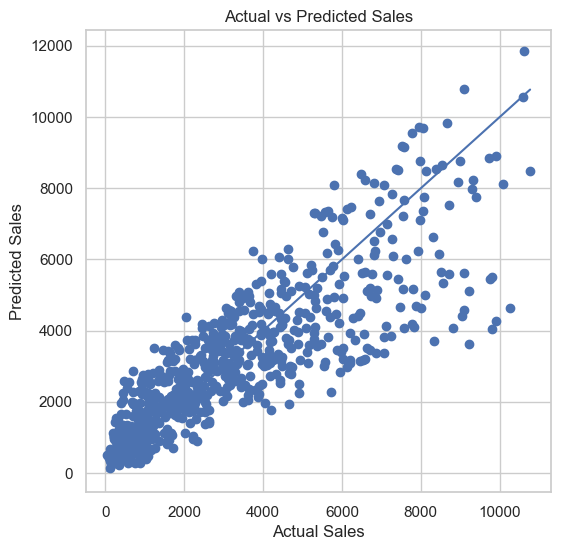

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


2️⃣ Residual Plot
🎯 Purpose:

Check karta hai ki errors random hain ya pattern bana rahe hain.

3️⃣ Residual Distribution (Histogram)
🎯 Purpose:

Check whether errors normally distributed hain.

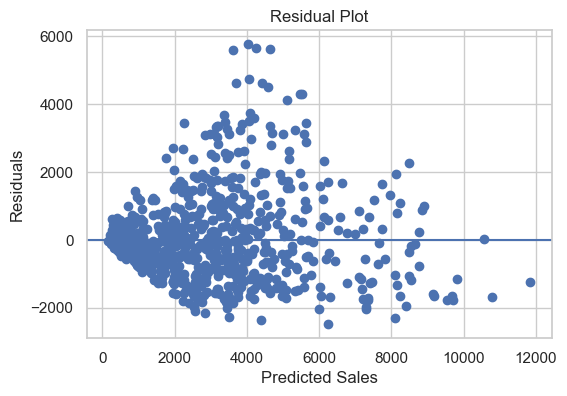

In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


📌 Interpretation:

Random scatter around 0 → Linear Regression assumptions satisfied

Pattern dikhe → Model improvement needed

3️⃣ Residual Distribution (Histogram)
🎯 Purpose:

Check whether errors normally distributed hain.

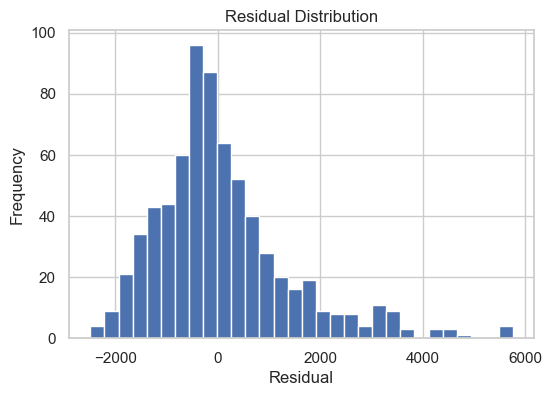

In [11]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


Interpretation:

Bell shaped → Good

Skewed → Model bias ho sakta hai

4️⃣ Feature Importance (Coefficient Plot)

Linear Regression me coefficients milte hain → ye feature importance hi hote hain.

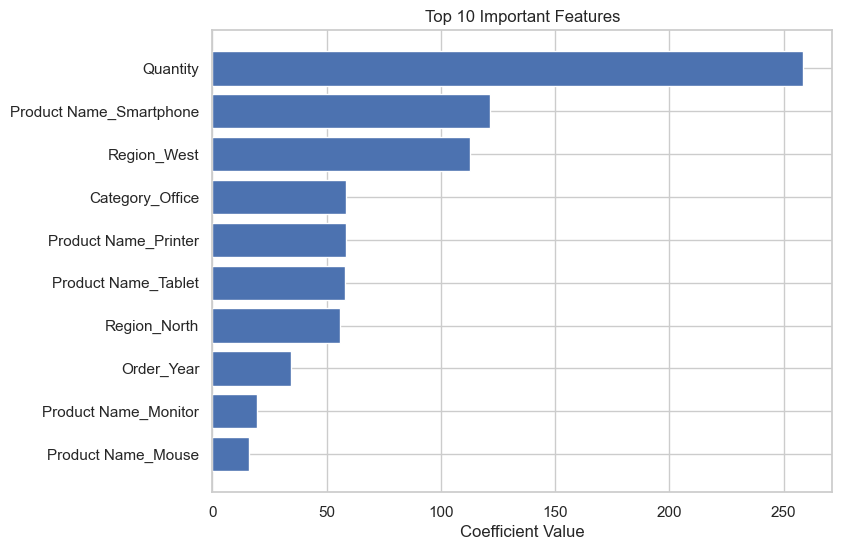

In [13]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": multi_reg.coef_
})

coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"][:10], coef_df["Coefficient"][:10])
plt.title("Top 10 Important Features")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()


📌 Interpretation:

Positive coefficient → Sales increase karta hai

Negative coefficient → Sales decrease karta hai

5️⃣ Correlation Heatmap
🎯 Purpose:

Check feature relationships and multicollinearity.

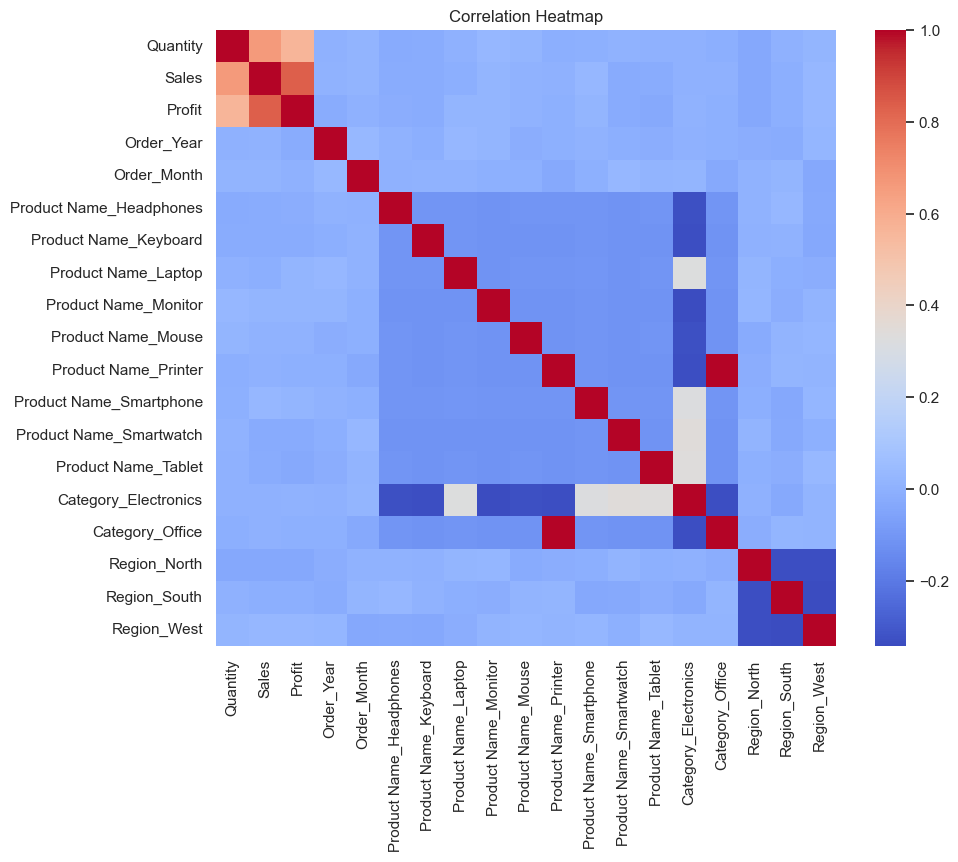

In [15]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_ml.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



Interpretation:

High correlation between features → Multicollinearity problem

High correlation with Sales → Strong predictor

## 5. Interpret coefficients


In [14]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": multi_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df.head(10)


,Feature,Coefficient
0,Quantity,258.500915
10,Product Name_Smartphone,121.554101
17,Region_West,112.579825
14,Category_Office,58.389700
9,Product Name_Printer,58.389700
12,Product Name_Tablet,57.925417
15,Region_North,56.032601
2,Order_Year,34.319496
7,Product Name_Monitor,19.307197
8,Product Name_Mouse,16.190711


**Interpretation:**  
Positive coefficients increase Sales, negative coefficients decrease Sales.


# Adjusted R² Analysis

## 🎯 Why Adjusted R²?

R² always increases when we add more features to the model, 
even if those features are not useful.

Adjusted R² penalizes unnecessary features and gives a more 
realistic measure of model performance.

## 📌 Formula:

Adjusted R² = 1 - (1 - R²) * (n - 1) / (n - p - 1)

Where:
- n = Total number of observations
- p = Number of predictors (features)


In [16]:
# Calculate Adjusted R²

n = X.shape[0]   # total observations
p = X.shape[1]   # total predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2)


R2 Score: 0.7202933867924615
Adjusted R2: 0.7188470440640111


## 📊 Interpretation

- If R² ≈ Adjusted R² → Model is well-fitted.
- If R² >> Adjusted R² → Model may be overfitting.
- Adjusted R² provides a more reliable metric when multiple features are used.


# Variance Inflation Factor (VIF)

## 🎯 Objective

VIF is used to detect multicollinearity between independent variables.

Multicollinearity occurs when independent variables are highly correlated 
with each other, which can distort regression results.

## 📌 VIF Interpretation Rule:

- VIF = 1 → No correlation
- VIF between 1–5 → Moderate correlation
- VIF > 5 → High correlation (problematic)
- VIF > 10 → Serious multicollinearity issue


In [20]:
X.dtypes
X.isnull().sum()
X = X.astype(float)






Some features showed infinite VIF values, indicating perfect multicollinearity. 
Such features were removed to ensure model stability.


In [22]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

vif_data = vif_data.replace([np.inf, -np.inf], np.nan)
vif_data = vif_data.dropna()

vif_data


C:\Users\neera\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Quantity,1.463909e+00
1,Profit,1.467435e+00
2,Order_Year,1.004126e+00
3,Order_Month,1.004589e+00
4,Product Name_Headphones,6.076338e+05
5,Product Name_Keyboard,6.291175e+05
6,Product Name_Laptop,1.743103e+00
7,Product Name_Monitor,6.524586e+05
8,Product Name_Mouse,6.219383e+05
10,Product Name_Smartphone,1.733170e+00


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

vif_data


C:\Users\neera\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Quantity,1.463909e+00
1,Profit,1.467435e+00
2,Order_Year,1.004126e+00
3,Order_Month,1.004589e+00
4,Product Name_Headphones,6.076338e+05
5,Product Name_Keyboard,6.291175e+05
6,Product Name_Laptop,1.743103e+00
7,Product Name_Monitor,6.524586e+05
8,Product Name_Mouse,6.219383e+05
9,Product Name_Printer,inf


## 📊 Interpretation

Features with high VIF values indicate multicollinearity.

If VIF > 10, that feature should be considered for removal 
to improve model stability.


# Train vs Test Performance Comparison

## 🎯 Objective

To check whether the model is overfitting or generalizing well.

If the model performs significantly better on training data 
than on testing data, it may be overfitting.


In [23]:
# Train prediction
y_train_pred = multi_reg.predict(X_train)

# Calculate R² for train and test
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)


Train R2: 0.7571860887063493
Test R2: 0.7202933867924615


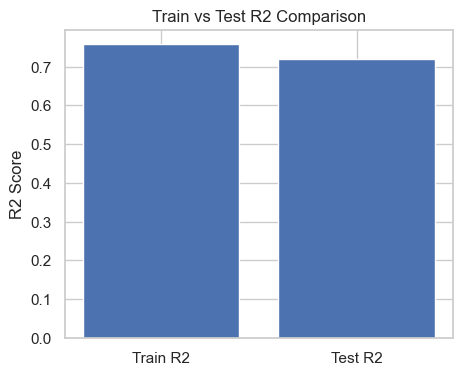

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.bar(["Train R2", "Test R2"], [train_r2, test_r2])
plt.title("Train vs Test R2 Comparison")
plt.ylabel("R2 Score")
plt.show()


## 📊 Interpretation

- If Train R² ≈ Test R² → Model generalizes well.
- If Train R² >> Test R² → Model is overfitting.
- If both are low → Model is underfitting.


# Sales Trend Over Time

## 🎯 Objective

To analyze how average sales change over time.

This provides business insights such as:
- Growth trend
- Seasonal patterns
- Peak performance months


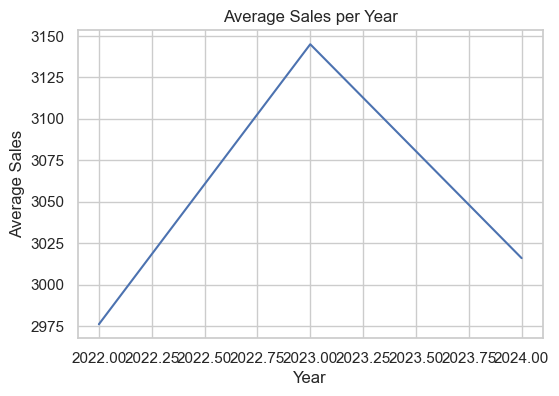

In [27]:
yearly_sales = df.groupby("Order_Year")["Sales"].mean()

plt.figure(figsize=(6,4))
plt.plot(yearly_sales.index, yearly_sales.values)
plt.title("Average Sales per Year")
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.show()


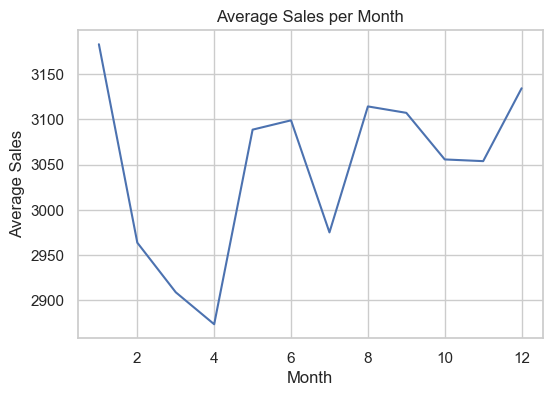

In [28]:
monthly_sales = df.groupby("Order_Month")["Sales"].mean()

plt.figure(figsize=(6,4))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Average Sales per Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


## 📊 Business Insight

- The yearly trend helps identify long-term growth.
- The monthly trend helps detect seasonality.
- Businesses can use this insight for marketing and inventory planning.


In [29]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2)
print("Train R2:", train_r2)
print("Test R2:", test_r2)


MSE: 1754854.7635348828
RMSE: 1324.7093128437207
R2 Score: 0.7202933867924615
Adjusted R2: 0.7188470440640111
Train R2: 0.7571860887063493
Test R2: 0.7202933867924615


## Model Evaluation Summary

- MSE measures average squared error.
- RMSE provides error in the same unit as Sales.
- R² explains the percentage of variance explained by the model.
- Adjusted R² penalizes unnecessary predictors.
- Train vs Test R² comparison checks overfitting.
